In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
import numpy.linalg as LA
%matplotlib inline

In [87]:
x_load = np.load('C:\Users\Namrata\Desktop\ITU\Fall_2018\Capstone\sign-language-digits-dataset\X.npy')
y_load = np.load('C:\Users\Namrata\Desktop\ITU\Fall_2018\Capstone\sign-language-digits-dataset\Y.npy')
img_size = 64


In [88]:
def distort_images(image_data, image_index_list, distortion_type=None):
    
    image_set = image_data.copy()
    
    for idx in range(len(image_index_list)):
        
        ii = image_index_list[idx]
        
        if distortion_type == None:
            return image_set
        
        elif distortion_type == 'high':
            test_img = image_set[ii] 
            test_img[test_img < 0.5] = 0.0
            image_set[ii] = test_img
            
        elif distortion_type == 'low':
            test_img = image_set[ii]
            test_img[test_img > 0.75] = 1.0
            image_set[ii] = test_img            
    
    return image_set
        

## Get images for number 3 and 1

In [89]:
# For 3
index_for_three = [0,1,2,3,4,5,6,7,8,9]
dist_x_load_3 = distort_images(x_load, index_for_three , 'high')

In [90]:
# For 1
index_for_one =  [900,901,902,903,904,905,906,907,908,909]
dist_x_load_1 = distort_images(x_load, index_for_one, 'high')

In [91]:
X_1 = dist_x_load_1.reshape(dist_x_load_1.shape[0], dist_x_load_1.shape[1]*dist_x_load_1.shape[2]).copy()

In [92]:
X_3 = dist_x_load_3.reshape(dist_x_load_3.shape[0], dist_x_load_3.shape[1]*dist_x_load_3.shape[2]).copy()

### Examples of image samples

In [93]:
def plot_an_example_image(X, image_index):
    # Example of number 1
    plt.figure(figsize=(6, 5))

    for ii in range(image_index, image_index+1):
        comp = X[ii,:]
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape((64,64 )),interpolation='nearest',vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
        
    plt.show()

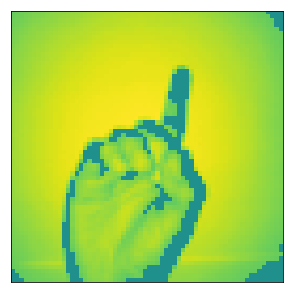

In [94]:
plot_an_example_image(X_1, 906)

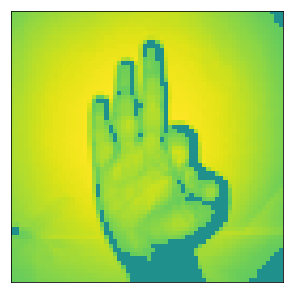

In [64]:
plot_an_example_image(X_3, 4)

## Compute $L_2$ PCA

In [95]:
def compute_pca_L2(X, K, image_index):
    n_components = 4
    X_pca = X[image_index,:]
    estimator = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
    estimator.fit(X_pca)
    components_ = estimator.components_
    pca_L2 = components_[:n_components]
    return pca_L2
    

In [96]:
pca_L2_for_3 = compute_pca_L2(X_3, 6, index_for_three)

In [97]:
pca_L2_for_1 = compute_pca_L2(X_1, 6, index_for_one)

### Project images on lower dimensional subspace

In [98]:
pca_projected_L2_for_3 = np.dot(np.dot(X_3[index_for_three], pca_L2_for_3.T), pca_L2_for_3)
pca_projected_L2_for_1 = np.dot(np.dot(X_1[index_for_one], pca_L2_for_1.T), pca_L2_for_1)
#pca_projected_L2_dist = np.dot(np.dot(dist_X_old[0:20],pca_L2_dist.T), components_)

In [99]:
pca_projected_L2_for_1.shape

(10L, 4096L)

In [100]:
pca_L2_for_3.shape

(4L, 4096L)

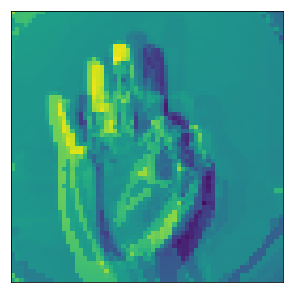

In [101]:
plot_an_example_image(pca_projected_L2_for_3, 4)

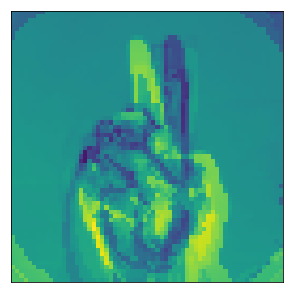

In [102]:
plot_an_example_image(pca_projected_L2_for_1, 4)

In [103]:
# # Get pca L2
# n_components = 4
# X = X_old[0:9,:]
# (n_samples, n_features) = X.shape
# estimator = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
# estimator.fit(X)
# components_ = estimator.components_
# pca_L2 = components_[:n_components]

In [104]:
# Visualiz3 subspace

# plt.figure(figsize=(6, 5))
# for i, comp in enumerate(pca_L2):
#     vmax = max(comp.max(), -comp.min())
#     plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
#     plt.xticks(())
#     plt.yticks(())
# plt.savefig('graph.png')
# plt.show()

In [ ]:
# n_components = 4
# X_dist = dist_X_old[0:9,:]
# #(n_samples, n_features) = X.shape
# estimator = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
# estimator.fit(X_dist)
# components_ = estimator.components_
# pca_L2_dist = components_[:n_components]

In [ ]:
# plt.figure(figsize=(6, 5))
# for i, comp in enumerate(pca_L2_dist):
#     vmax = max(comp.max(), -comp.min())
#     plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
#     plt.xticks(())
#     plt.yticks(())
# plt.savefig('graph.png')
# plt.show()

In [75]:
plt.figure(figsize=(6, 5))

for ii in range(3,4):
    comp = dist_X_old[ii,:]
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
#plt.savefig('graph.png')
plt.show()

NameError: name 'dist_X_old' is not defined

## Sub-optimal $L_1$ PCA

In [105]:
# Sgn function
def to_binary(x):
    return np.where(x > 0.0, 1, -1)

In [106]:
# For inner iteration to compute single sub-optiinal L1 PCA
def single_sub_optimal(b, X, num_iter):
    counter = 0

    while counter <= num_iter:
        b = to_binary(np.dot(np.dot(X.T, X), b))
        counter = counter + 1
        #print (counter, num_iter)
    
    print ('# of iterations: ', num_iter)
    
    return b

In [107]:
# Multiple sub-optimal L1 PCA
def multiple_sub_optimal(X_org, K):
    
    R = np.zeros((X_org.shape[0], K))
    X = X_org.copy()
    
    for k in range(K):
        # Different initialization per componenet
        b = np.random.randn(X.shape[1],1)
        b_ini = to_binary(b)
        # Find sub-optimal b
        b = single_sub_optimal(b_ini, X, 50)
        #Find sub-optimal single L1-PCA
        r_not_normal = np.dot(X, b)
        r_normal = r_not_normal/LA.norm(r_not_normal)
        # Store the vector
        R[:, [k]] = r_normal
        # Update X
        X = X - np.dot(np.dot(r_normal, r_normal.T),X)
    
    return R

In [108]:
R_1 = multiple_sub_optimal(X_1[index_for_one].T,6)

('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)


In [109]:
R_3 = multiple_sub_optimal(X_3[index_for_three].T,6)

('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)


### Projection of images on to L1 subspace

In [110]:
pca_projected_L1_for_1 = np.dot(np.dot(X_1[index_for_one], R_1), R_1.T)
pca_projected_L1_for_3 = np.dot(np.dot(X_3[index_for_three], R_3), R_3.T)

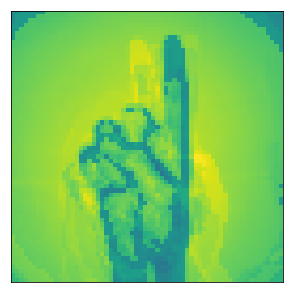

In [111]:
plot_an_example_image(pca_projected_L1_for_1, 4)

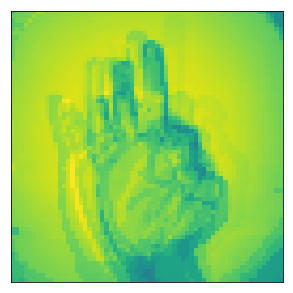

In [112]:
plot_an_example_image(pca_projected_L1_for_3, 4)

In [ ]:
b_ini = np.random.randn(X.shape[1],1)

In [ ]:
b = single_sub_optimal(b_ini, X, 3)

In [ ]:
n_components = 10
(n_samples, n_features) = X.shape
estimator = decomposition.PCA(n_components=n_components, svd_solver='randomized', whiten=True)
estimator.fit(X)
components_ = estimator.components_
images = components_[:n_components]
plt.figure(figsize=(6, 5))
for i, comp in enumerate(images):
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
plt.savefig('graph.png')
plt.show()

In [ ]:
#def RandomNoise(x_noisy):
#x_noisy = x_load + 3 * x_load.std() * np.random.random(x_load.shape)
x_noisy = x_load + 0.1  * np.random.random(x_load.shape)


In [ ]:
# one sample from each digits
image_index_list = [260,900,1800,1600,1400,2061,700,500,1111,100]
for each in range(10):
    plt.figure(figsize=(8,5))
    plt.imshow(x_noisy[image_index_list[each]].reshape(img_size, img_size))
    plt.axis('off')
    title = "Sign " + str(each) 
    plt.title(title)
plt.show()

In [ ]:
X = x_noisy.reshape((len(x_noisy), -1)) 
train = X
test = X[image_index_list]
n_pixels = X.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
X_test = test[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
y_test = test[:, n_pixels // 2:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
n_components = 5
(n_samples, n_features) = X.shape
estimator = decomposition.PCA(n_components=n_components, svd_solver='randomized', whiten=True)
estimator.fit(X)
components_ = estimator.components_
images = components_[:n_components]
plt.figure(figsize=(6, 5))
for i, comp in enumerate(images):
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
plt.savefig('graph.png')
plt.show()